<a href="https://colab.research.google.com/github/SamTremblay18/Hockey-Shot-Classification/blob/main/CNN_Method7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Method 7 -  Reframe to 576 frames and HTSC (Hands/Torso sensor configuration)

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from google.colab import drive 
drive.mount('/content/drive')
import pickle
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import layers 
from keras import models
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout, GlobalAveragePooling1D

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

Mounted at /content/drive


In [2]:
def open_pickle(path_pickle):
  f = open(path_pickle, 'rb')
  P = pickle.load(f)
  f.close()

  return P

In [3]:
X_test = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_test7.pickle')
X_train = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_train7.pickle')
y_test = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_test7.pickle')
y_train = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_train7.pickle')

#1 - Hfawaz CNN 3 layers, 3 filters=128,  3 dropout, l1_l2 

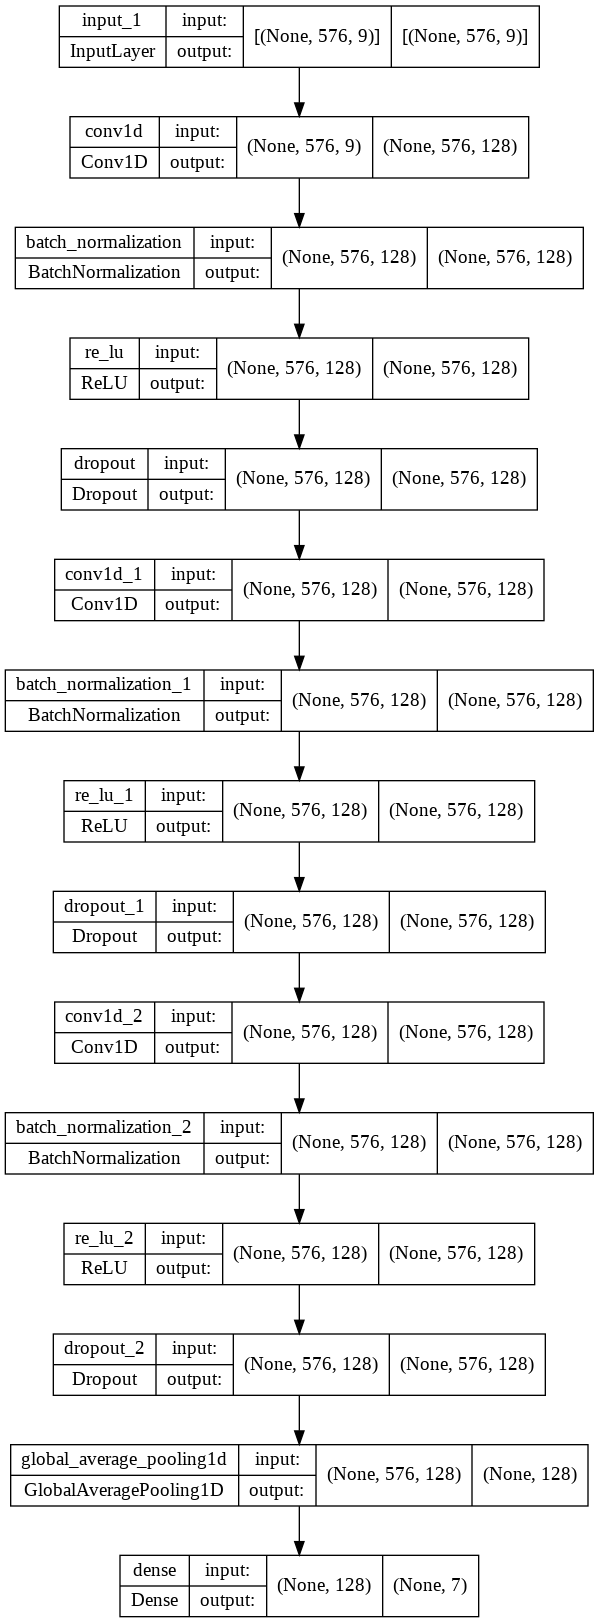

In [4]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=128, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.Dropout(0.5)(conv1)

    conv2 = keras.layers.Conv1D(filters=128, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    conv2 = keras.layers.Dropout(0.5)(conv2)

    conv3 = keras.layers.Conv1D(filters=128, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)
    conv3 = keras.layers.Dropout(0.5)(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [5]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model1.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
66/66 [==============================] - 13s 24ms/step - loss: 4.3005 - sparse_categorical_accuracy: 0.5938 - val_loss: 3.4580 - val_sparse_categorical_accuracy: 0.2102 - lr: 0.0010
Epoch 2/500
66/66 [==============================] - 1s 16ms/step - loss: 1.6212 - sparse_categorical_accuracy: 0.8095 - val_loss: 2.5129 - val_sparse_categorical_accuracy: 0.1989 - lr: 0.0010
Epoch 3/500
66/66 [==============================] - 1s 16ms/step - loss: 0.9841 - sparse_categorical_accuracy: 0.8479 - val_loss: 2.4794 - val_sparse_categorical_accuracy: 0.2083 - lr: 0.0010
Epoch 4/500
66/66 [==============================] - 1s 15ms/step - loss: 0.8985 - sparse_categorical_accuracy: 0.8422 - val_loss: 2.3860 - val_sparse_categorical_accuracy: 0.2121 - lr: 0.0010
Epoch 5/500
66/66 [==============================] - 1s 16ms/step - loss: 0.8123 - sparse_categorical_accuracy: 0.8578 - val_loss: 1.8860 - val_sparse_categorical_accuracy: 0.2898 - lr: 0.0010
Epoch 6/500
66/66 [===============

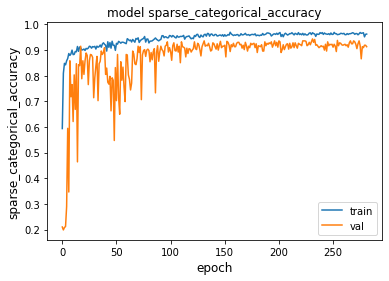

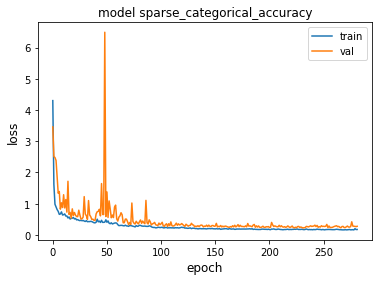

In [6]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()